## Diffusion:

In machine learning, diffusion models, also known as diffusion probabilistic models or score-based generative models, are a class of latent variable generative models.

## Equation for forward Diffusion Process

![Screenshot from 2024-06-09 14-58-41.png](<attachment:Screenshot from 2024-06-09 14-58-41.png>)
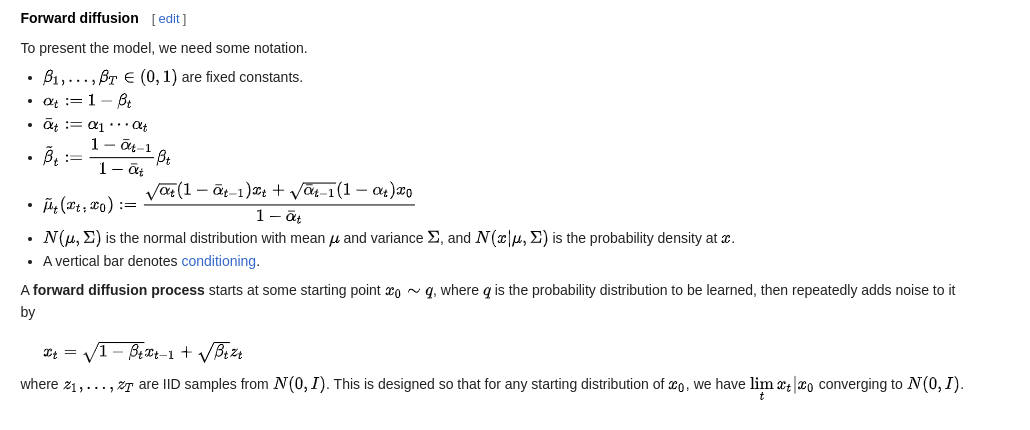

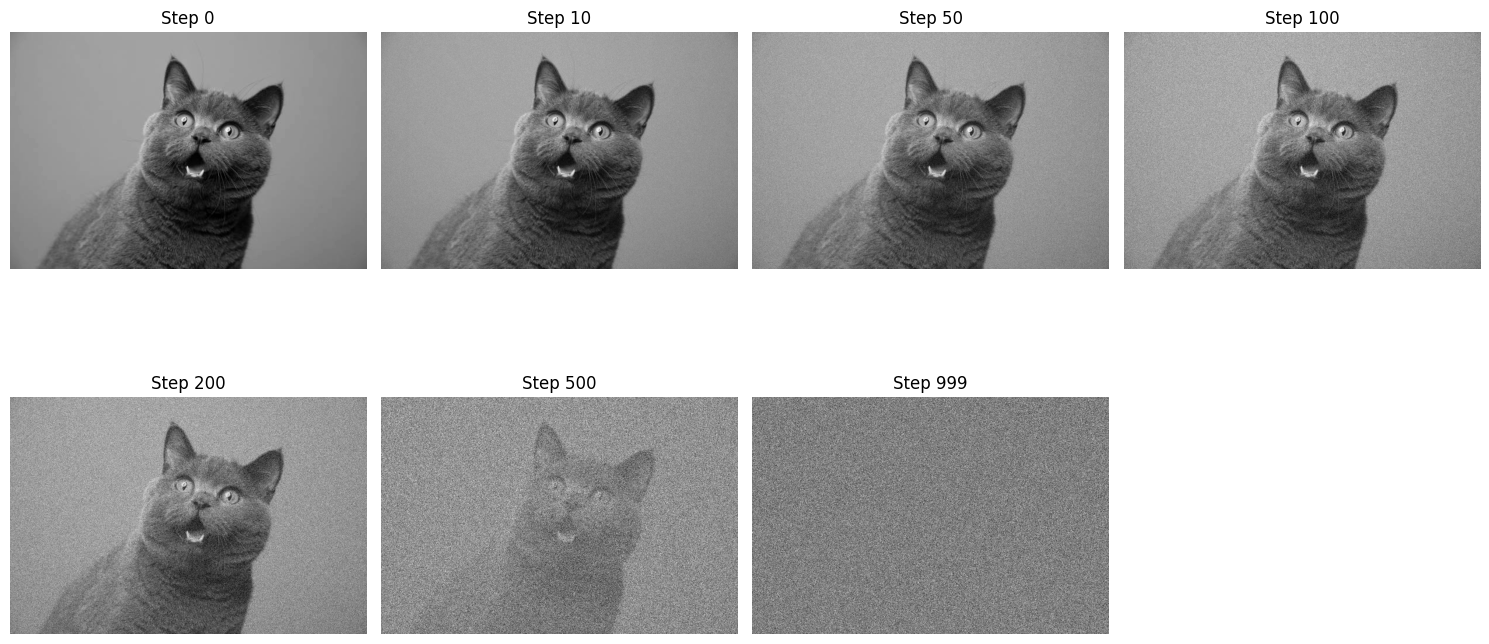

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def add_noise(img, t, beta, alpha_cumprod):
    noise = np.random.normal(0, np.sqrt(beta[t]), img.shape)
    mean = np.sqrt(alpha_cumprod[t]) * img
    noisy_img = mean + noise
    return noisy_img

image_path = 'cat.jpg'  
img = Image.open(image_path).convert('L')  
img = np.array(img) / 255.0  


T = 1000

# Define the variance schedule (beta)
beta = np.linspace(0.0001, 0.02, T)
alpha = 1 - beta
alpha_cumprod = np.cumprod(alpha)

noisy_images = [img]
for t in range(T):
    noisy_img = add_noise(img, t, beta, alpha_cumprod)
    noisy_images.append(noisy_img)

# Plot the noisy images at different steps
plt.figure(figsize=(15, 8))
steps_to_plot = [0, 10, 50, 100, 200, 500, 999]
for i, step in enumerate(steps_to_plot):
    plt.subplot(2, 4, i + 1)
    plt.title(f'Step {step}')
    plt.imshow(noisy_images[step], cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()


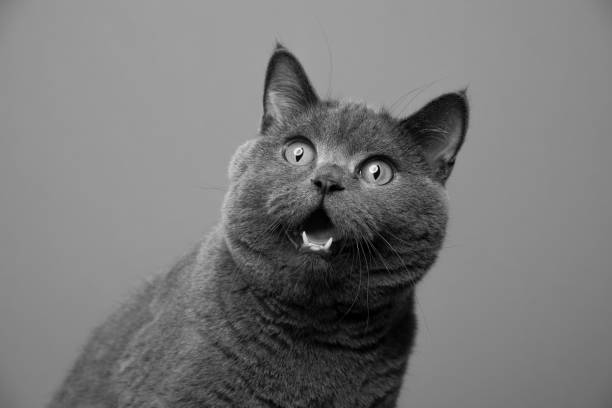

In [55]:

image_path = 'cat.jpg'
img = Image.open(image_path).convert('L')  
img

In [56]:
img = np.array(img) / 255.0 
T = 1000
beta = np.linspace(0.0001, 0.02, T)
alpha = 1 - beta
alpha_cumprod = np.cumprod(alpha)


In [57]:
# Sample Noise from Normal Distribution
noise = np.random.normal(0, np.sqrt(beta[0]), img.shape)
noise.shape

(408, 612)

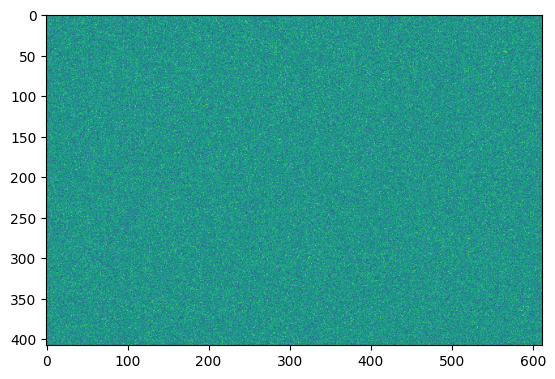

In [58]:
plt.imshow(noise)
plt.show()

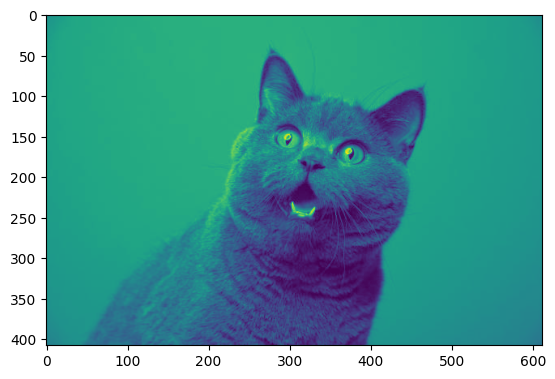

In [59]:
# Calculate mean 
mean = np.sqrt(alpha_cumprod[0]) * img
plt.imshow(mean)
plt.show()

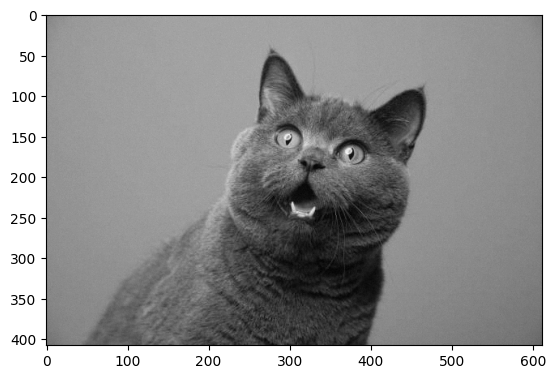

In [50]:
noisy_img = mean + noise

plt.imshow(noisy_img,cmap="gray")
plt.show()

# Reverse Diff Process

![Screenshot from 2024-06-09 15-03-24.png](<attachment:Screenshot from 2024-06-09 15-03-24.png>)
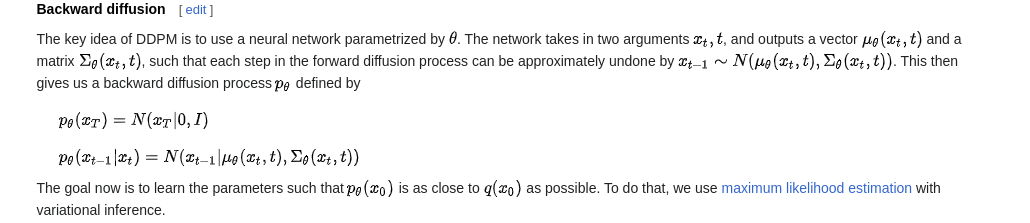

![Screenshot from 2024-06-09 15-03-51.png](<attachment:Screenshot from 2024-06-09 15-03-51.png>)
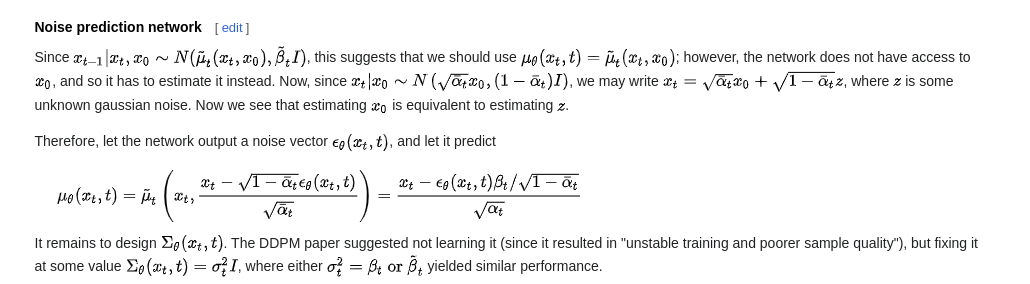

In [52]:
def epsilon_theta(x_t, t):
    return np.random.normal(0, 1, x_t.shape)  # Replace with actual neural network model

def reverse_diffusion(x_T, T, beta, alpha_cumprod):
    x_t = x_T
    reverse_samples = [x_T]
    
    for t in reversed(range(1, T)):
        beta_t = beta[t]
        alpha_t = alpha[t]
        alpha_cumprod_t = alpha_cumprod[t]
        
        epsilon_pred = epsilon_theta(x_t, t)
        
        mean = (1 / np.sqrt(alpha_t)) * (x_t - (beta_t / np.sqrt(1 - alpha_cumprod_t)) * epsilon_pred)
        variance = beta_t
        
        noise = np.random.normal(0, np.sqrt(variance), x_t.shape)
        x_t = mean + noise
        reverse_samples.append(x_t)
    
    return reverse_samples

x_T = noisy_images[-1]

reverse_samples = reverse_diffusion(x_T, T, beta, alpha_cumprod)
